In [1]:
from scipy.misc import imread,imshow,imsave
import numpy as np
from itertools import accumulate

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
%matplotlib inline

In [2]:
img1 = np.floor(imread("/home/ryan/Desktop/histo.jpg",flatten=True))
img3 = np.floor(imread("/home/ryan/Desktop/cat.jpg"))

In [3]:
def _histo(img):
    
    histo = accumulate([np.sum(np.floor(img)==i) for i in range(256)])
    histo = 255*np.fromiter(histo,np.uint32)/img.size
    
    for i in range(256):
        img[img==i] = histo[i]+256
    
    return img-256

In [4]:
def histo(img):

    if len(img.shape)<3:
        img = _histo(img)
    else:
        c = img.shape[2]
        for i in range(c):
            img[:,:,i] = _histo(img[:,:,i])
    return img
        

In [5]:
imshow(histo(img3))

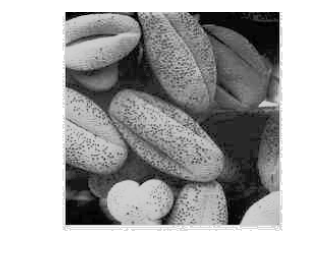

In [6]:
plt.axis('off')
plt.imshow(histo(img1),cmap='Greys_r')